In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import optuna
from sklearn.manifold import TSNE
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

In [49]:
dataset = pd.read_csv("Processed_dataset.csv")

In [50]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### PCA

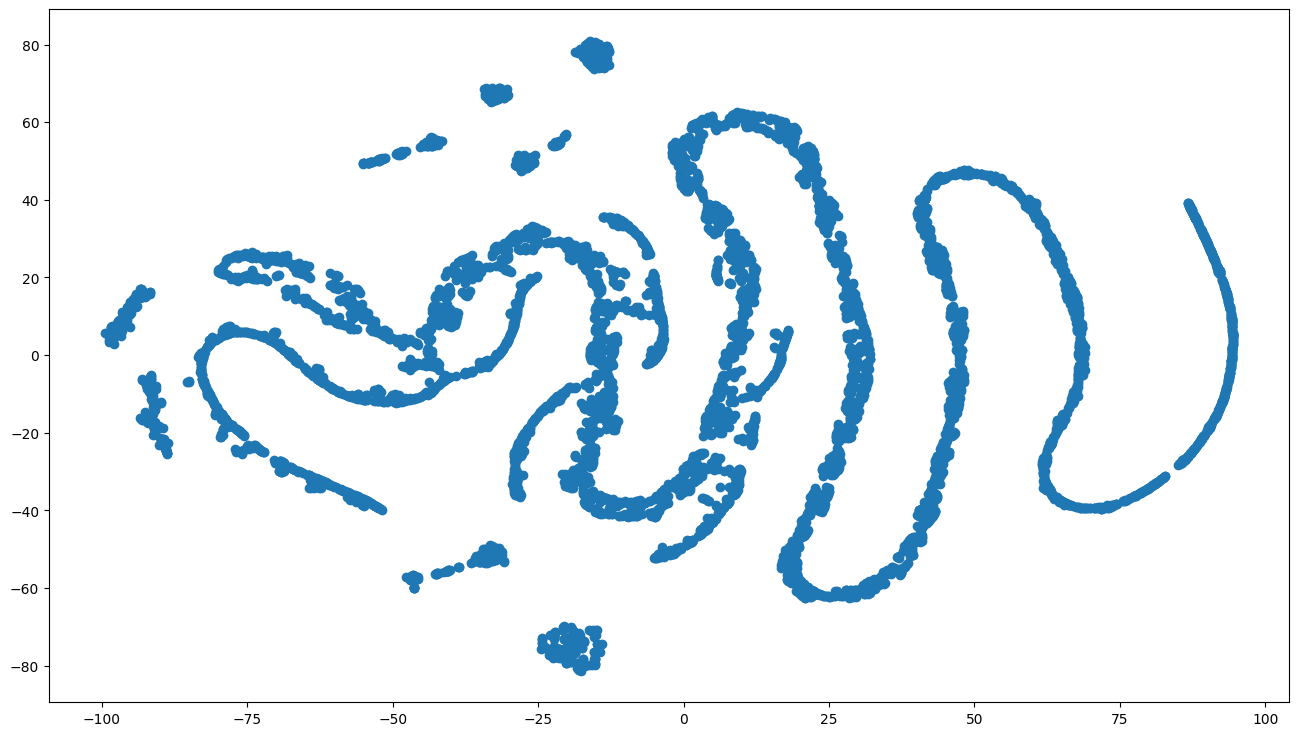

In [51]:
projection = TSNE(n_components=2).fit_transform(dataset)
plt.figure(figsize=(16,9))
plt.scatter(projection[:,0], projection[:,1])

In [52]:
brch = Birch(threshold=15.097932202030867, branching_factor=54, n_clusters=4)
centers = Birch(threshold=15.097932202030867, branching_factor=54, n_clusters=4)

In [53]:
brch.fit(projection)
centers.fit(projection)

Birch(branching_factor=54, n_clusters=4, threshold=15.097932202030867)

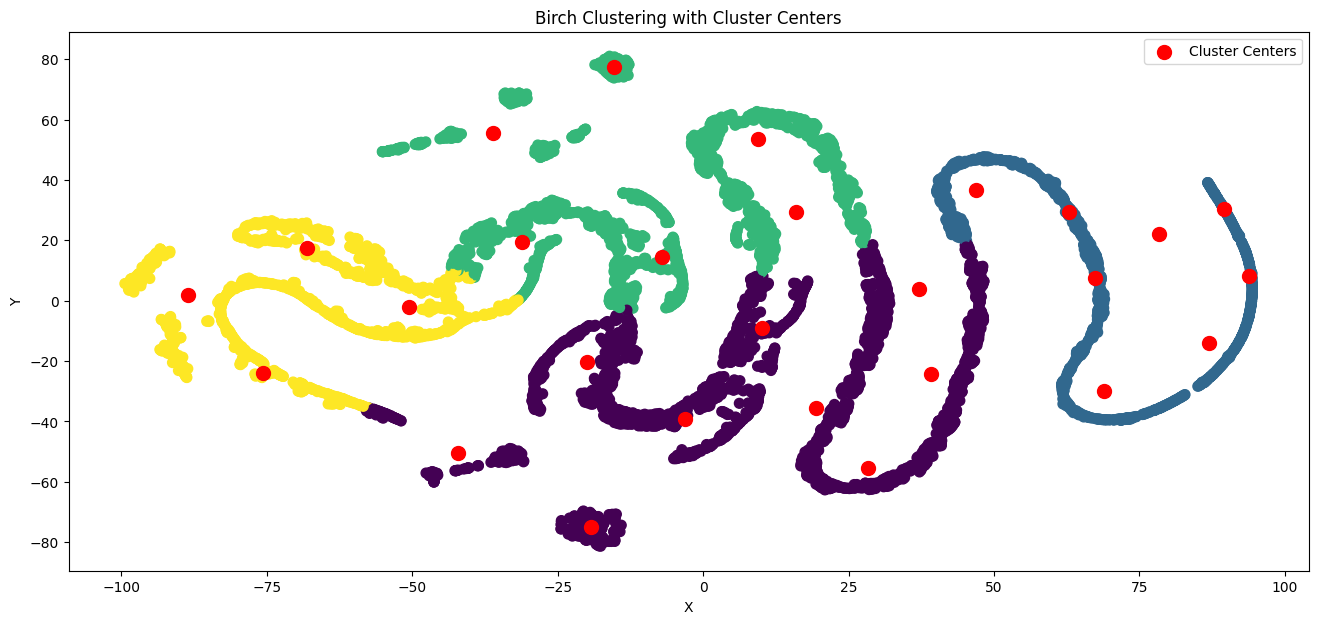

In [54]:
plt.figure(figsize=(16,7))
plt.scatter(projection[:, 0], projection[:, 1], c=brch.labels_, cmap='viridis', s=50, alpha=1)
plt.scatter(centers.subcluster_centers_[:, 0], centers.subcluster_centers_[:, 1], c='red', s=100, marker='o', label='Cluster Centers')
plt.title('Birch Clustering with Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

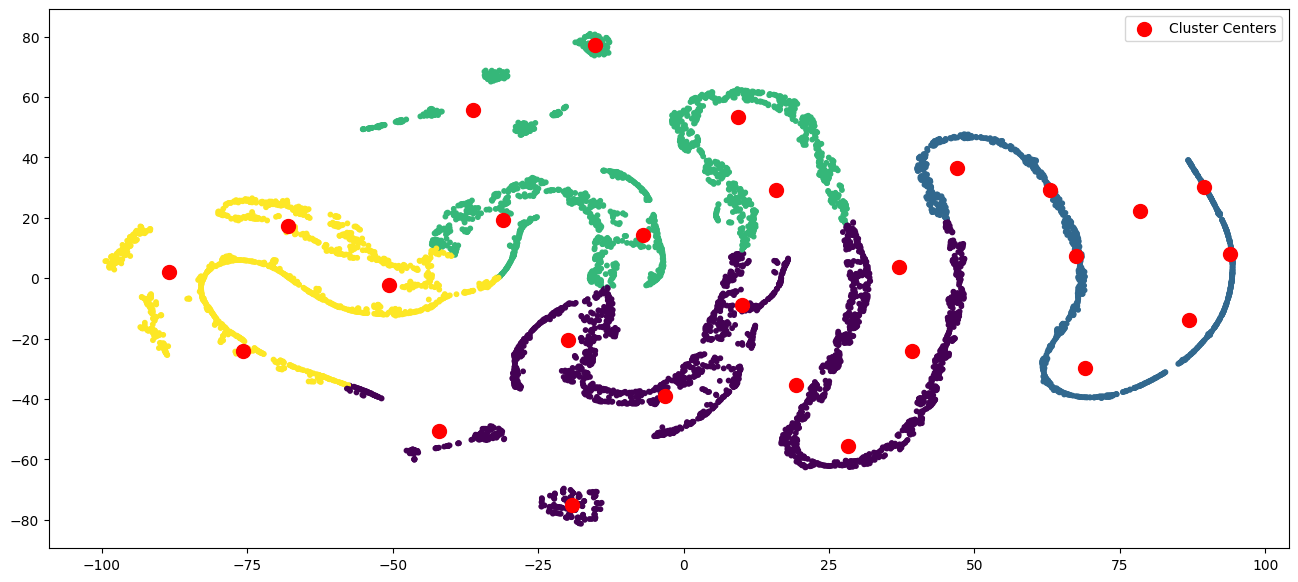

In [55]:
plt.figure(figsize=(16,7))
plt.scatter(projection[:, 0], projection[:, 1], c=brch.labels_, cmap='viridis', s=10, alpha=1)
plt.scatter(centers.subcluster_centers_[:, 0],centers.subcluster_centers_[:, 1], c='red', s=100, marker='o', label='Cluster Centers')
plt.legend()
plt.show()

Davies Bouldin indeksi 0 ile +sonsuz arasında değer alır. Sonuçlar 0'a yakınlaştıkça daha iyi çıktı verir.
Silhouette indeksi -1 ile 1 arasında değer alır. Sonuçlar 1'e yakınlaştıkça daha iyi bir çıktı verir.

### Best results obtained at 4 clusters.

In [56]:
from sklearn import metrics
for i in range(4,15):
    birch = Birch(threshold=15.097932202030867, branching_factor=54, n_clusters=i)
    labels = birch.fit_predict(dataset)     
    print("Silhouette score for {} clusters Birch: {} ".format(i,metrics.silhouette_score(dataset,labels, metric='euclidean').round(3)))
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(dataset,labels).round(3)))

Silhouette score for 4 clusters Birch: 0.63 
Davies Bouldin Score:0.483
Silhouette score for 5 clusters Birch: 0.573 
Davies Bouldin Score:0.501
Silhouette score for 6 clusters Birch: 0.58 
Davies Bouldin Score:0.503
Silhouette score for 7 clusters Birch: 0.572 
Davies Bouldin Score:0.498
Silhouette score for 8 clusters Birch: 0.558 
Davies Bouldin Score:0.506
Silhouette score for 9 clusters Birch: 0.558 
Davies Bouldin Score:0.502
Silhouette score for 10 clusters Birch: 0.561 
Davies Bouldin Score:0.498
Silhouette score for 11 clusters Birch: 0.564 
Davies Bouldin Score:0.499
Silhouette score for 12 clusters Birch: 0.532 
Davies Bouldin Score:0.511
Silhouette score for 13 clusters Birch: 0.523 
Davies Bouldin Score:0.515
Silhouette score for 14 clusters Birch: 0.519 
Davies Bouldin Score:0.519


In [57]:
birch = Birch(threshold=15.097932202030867, branching_factor=54, n_clusters=4)
labels = birch.fit_predict(dataset)     
print("Silhouette score for {} clusters Birch: {} ".format(4,metrics.silhouette_score(dataset,labels, metric='euclidean').round(3)))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(dataset,labels).round(3)))

Silhouette score for 4 clusters Birch: 0.63 
Davies Bouldin Score:0.483


# Making optimized factors
## Current Best params: {'branching_factor': 54, 'n_clusters': 4, 'threshold': 15.097932202030867}

In [58]:
def with_actual_dataset(trial):
    branching_factor = trial.suggest_int('branching_factor', 15, 200)
    clusterCount = trial.suggest_int('n_clusters', 4, 4)
    threshold = trial.suggest_float('threshold', 0.1, 20.0)
    
    model = Birch(branching_factor=branching_factor, threshold=threshold, n_clusters=clusterCount)
    clusters = model.fit_predict(dataset)
    
    silhouette_avg = silhouette_score(dataset, clusters)
    return silhouette_avg

def with_normalized_dataset(trial):
    branching_factor = trial.suggest_int('branching_factor', 50, 200)
    clusterCount = trial.suggest_int('n_clusters', 4, 10)
    threshold = trial.suggest_float('threshold', 0.01, 2)
    
    model = Birch(branching_factor=branching_factor, threshold=threshold, n_clusters=clusterCount)
    clusters = model.fit_predict(normalized_dataset)
    silhouette_avg = silhouette_score(normalized_dataset, clusters)
    return silhouette_avg

In [59]:
study = optuna.create_study(direction='maximize')
study.optimize(with_actual_dataset, n_trials=10)
best_params = study.best_params
best_value = study.best_value
print("Best params:", best_params, "Best Value:", best_value)

[I 2024-05-06 22:49:47,058] A new study created in memory with name: no-name-2dd15fab-ac7e-49b2-b314-acb502ece110
[I 2024-05-06 22:49:48,507] Trial 0 finished with value: 0.5949410012217211 and parameters: {'branching_factor': 133, 'n_clusters': 4, 'threshold': 0.6387611038874749}. Best is trial 0 with value: 0.5949410012217211.
[I 2024-05-06 22:49:49,040] Trial 1 finished with value: 0.5779309544706414 and parameters: {'branching_factor': 160, 'n_clusters': 4, 'threshold': 18.444913789243866}. Best is trial 0 with value: 0.5949410012217211.
[I 2024-05-06 22:49:49,623] Trial 2 finished with value: 0.6180935048449502 and parameters: {'branching_factor': 41, 'n_clusters': 4, 'threshold': 13.833055758950614}. Best is trial 2 with value: 0.6180935048449502.
[I 2024-05-06 22:49:50,281] Trial 3 finished with value: 0.5737779850561381 and parameters: {'branching_factor': 107, 'n_clusters': 4, 'threshold': 9.028947660700142}. Best is trial 2 with value: 0.6180935048449502.
[I 2024-05-06 22:49:

Best params: {'branching_factor': 41, 'n_clusters': 4, 'threshold': 13.833055758950614} Best Value: 0.6180935048449502


### Normalizing the dataset

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_dataset = scaler.fit_transform(dataset)
normalized_dataset = pd.DataFrame(normalized_dataset, columns=dataset.columns)
normalized_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,1.0,1.0,0.323944,1.0,1.0,0.662189,0.227521,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.845274,0.847461,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,1.0,1.0,0.140845,0.0,1.0,0.112935,0.037809,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.558706,0.033210,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


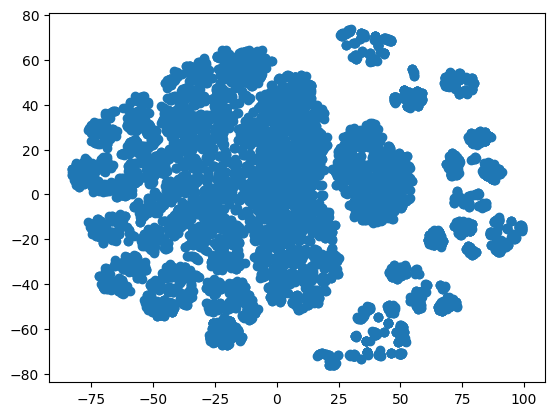

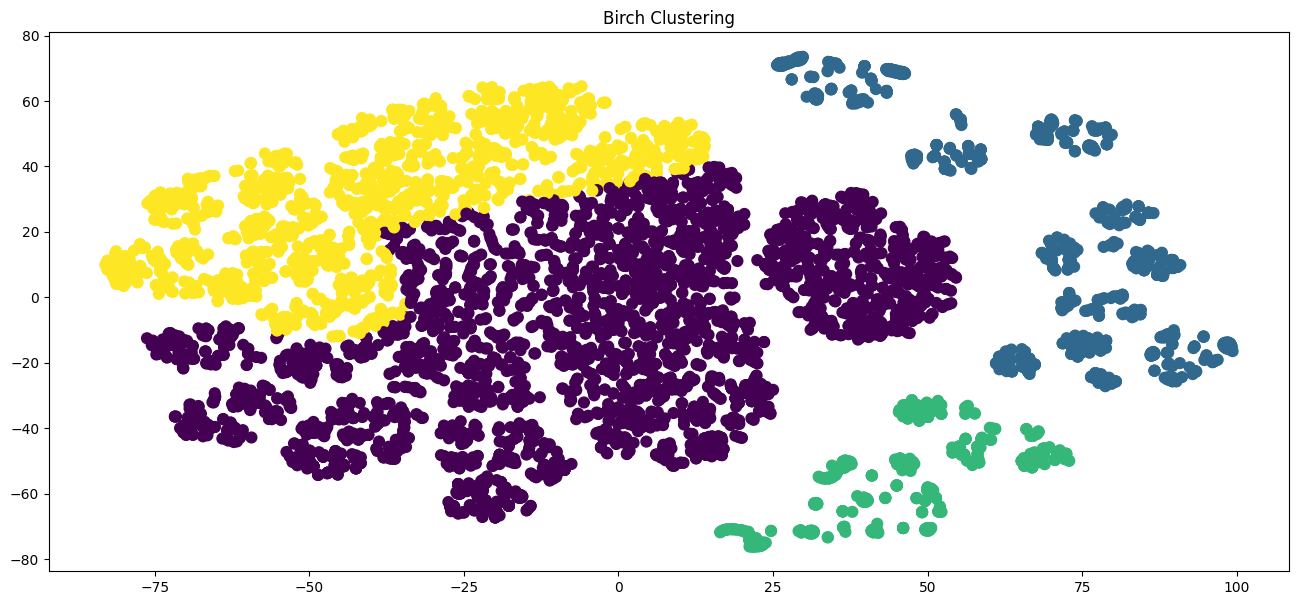

In [61]:
projection = TSNE(n_components=2).fit_transform(normalized_dataset)
plt.scatter(projection[:, 0], projection[:, 1])
brch = Birch(threshold=15.097932202030867, branching_factor=54, n_clusters=4)
brch.fit(projection)
plt.figure(figsize=(16, 7))
plt.scatter(projection[:, 0], projection[:, 1], c=brch.labels_, cmap='viridis', s=60, alpha=1)
plt.title('Birch Clustering')
plt.show()

# Optimize with normalized dataset

### branching_factor: 50
### threshold: 0.7448794990386168
### n_clusters: 4

In [62]:
study = optuna.create_study(direction='maximize')
study.optimize(with_normalized_dataset, n_trials=10)
best_params = study.best_params
best_value = study.best_value
print("Best params:", best_params, "Best Value:", best_value)

[I 2024-05-06 22:50:12,075] A new study created in memory with name: no-name-f67d394a-7408-48b9-9926-aeb3e5020463
[I 2024-05-06 22:50:13,185] Trial 0 finished with value: 0.17622726839717673 and parameters: {'branching_factor': 80, 'n_clusters': 4, 'threshold': 0.528174940119048}. Best is trial 0 with value: 0.17622726839717673.
[I 2024-05-06 22:50:14,697] Trial 1 finished with value: 0.15886281759474705 and parameters: {'branching_factor': 116, 'n_clusters': 5, 'threshold': 0.058838369991845454}. Best is trial 0 with value: 0.17622726839717673.
[I 2024-05-06 22:50:15,396] Trial 2 finished with value: 0.09314816885660719 and parameters: {'branching_factor': 126, 'n_clusters': 10, 'threshold': 1.5125110657223388}. Best is trial 0 with value: 0.17622726839717673.
[I 2024-05-06 22:50:16,934] Trial 3 finished with value: 0.14074233018250545 and parameters: {'branching_factor': 104, 'n_clusters': 10, 'threshold': 0.6308833055802419}. Best is trial 0 with value: 0.17622726839717673.
[I 2024-

Best params: {'branching_factor': 80, 'n_clusters': 4, 'threshold': 0.528174940119048} Best Value: 0.17622726839717673


In [63]:
cluster1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
for i in range(len(dataset)):
    if birch.labels_[i] == 0:
        cluster1.append(i)
    elif birch.labels_[i] == 1:
        cluster_2.append(i)
    elif birch.labels_[i] == 2:
        cluster_3.append(i)
    elif birch.labels_[i] == 3:
        cluster_4.append(i)

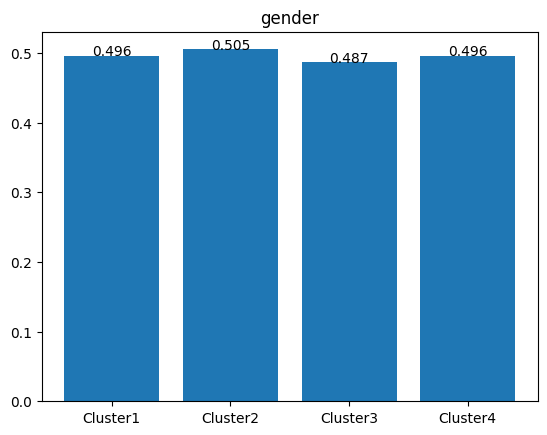

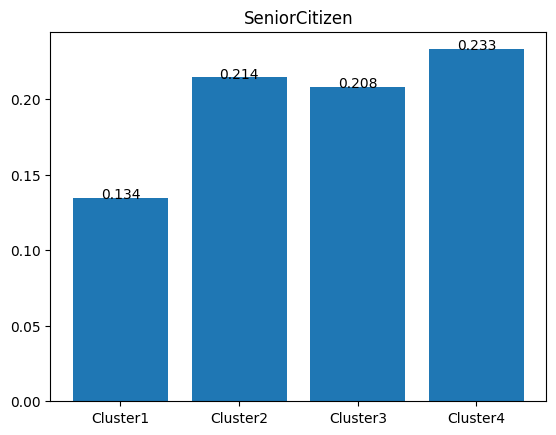

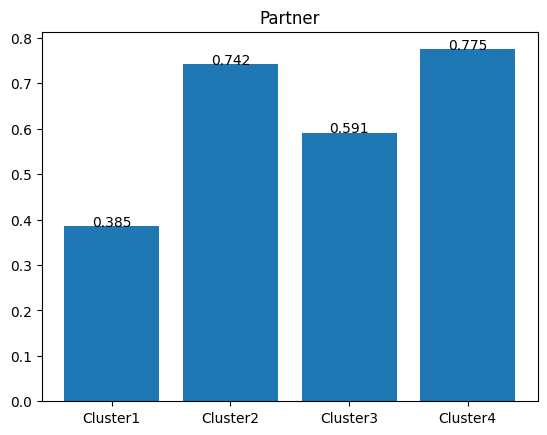

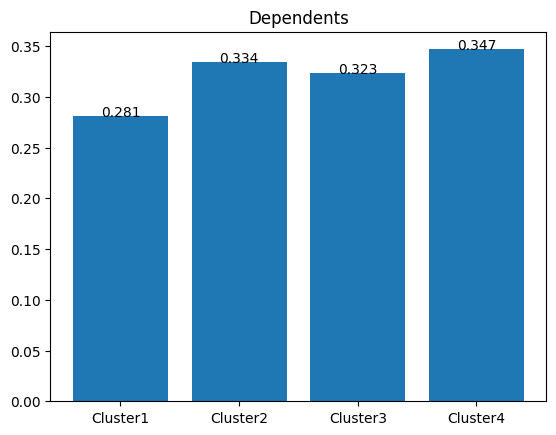

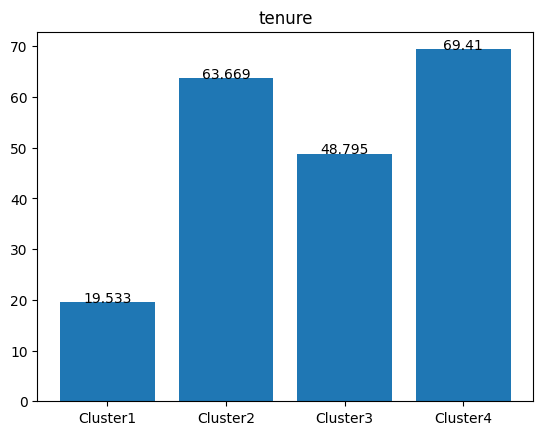

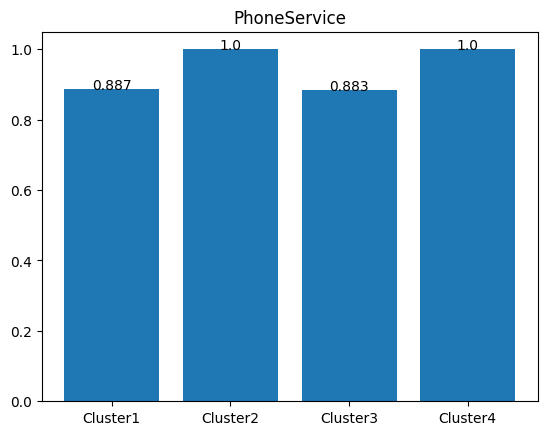

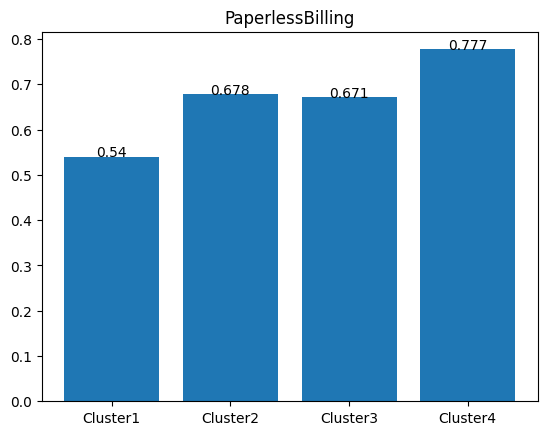

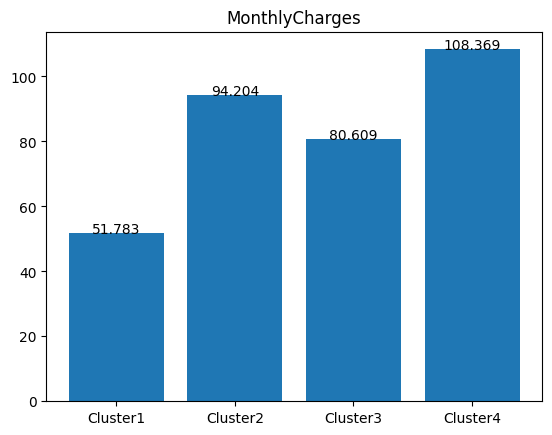

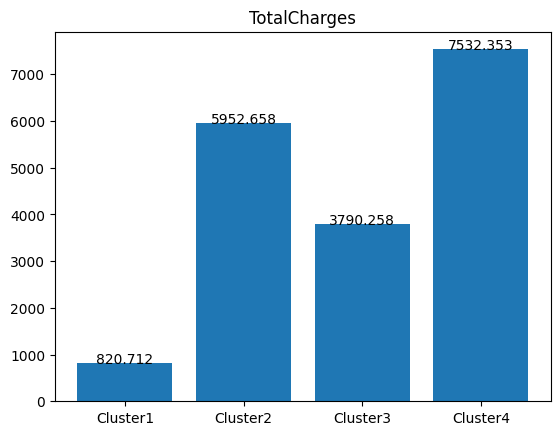

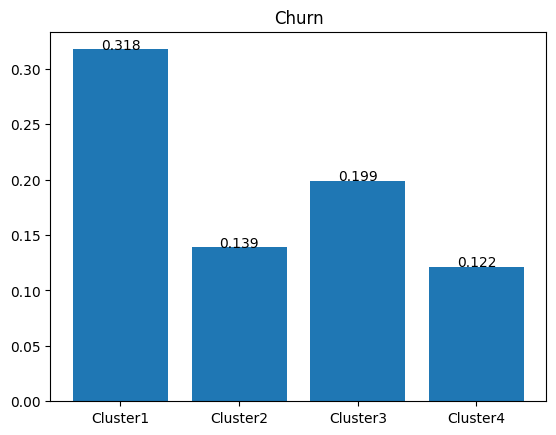

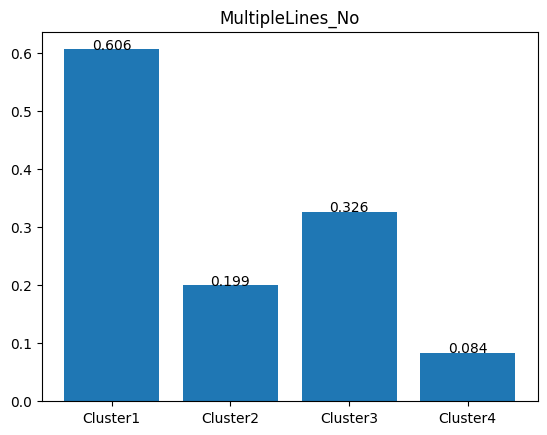

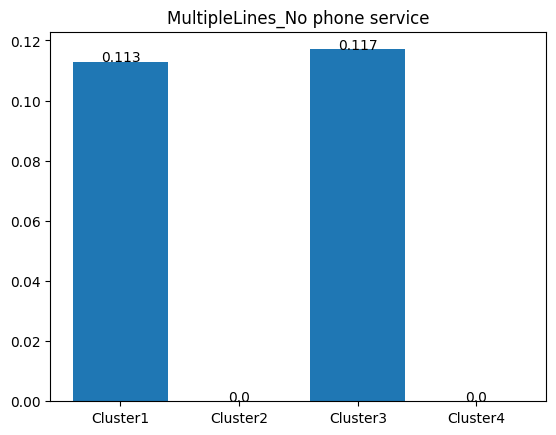

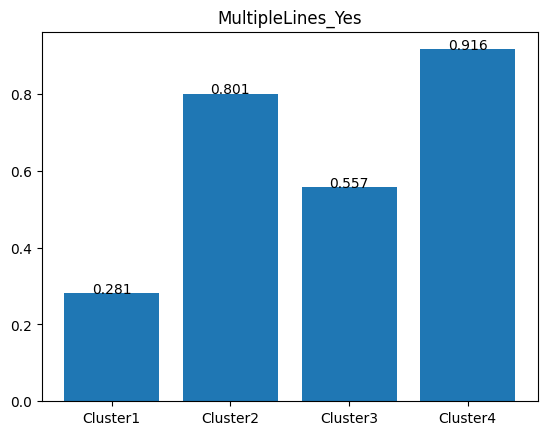

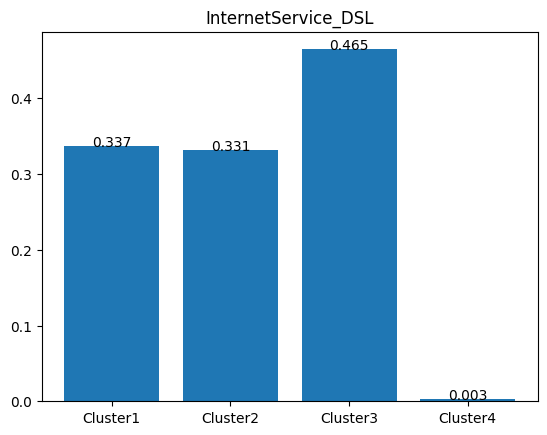

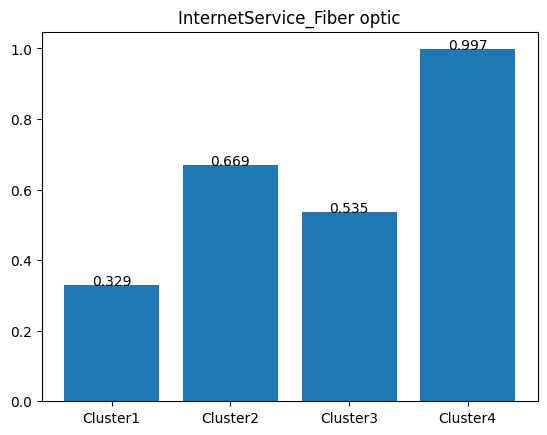

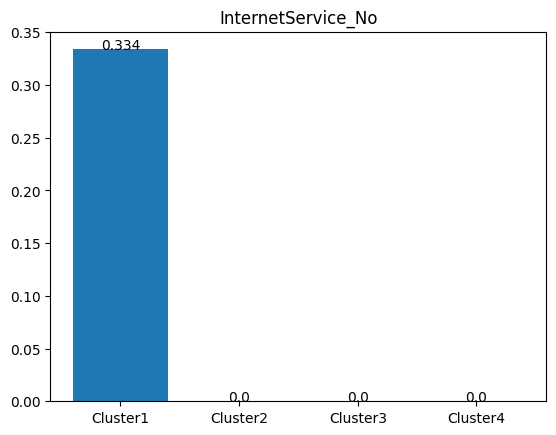

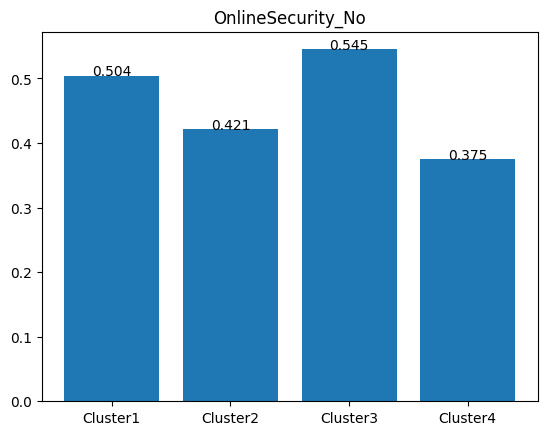

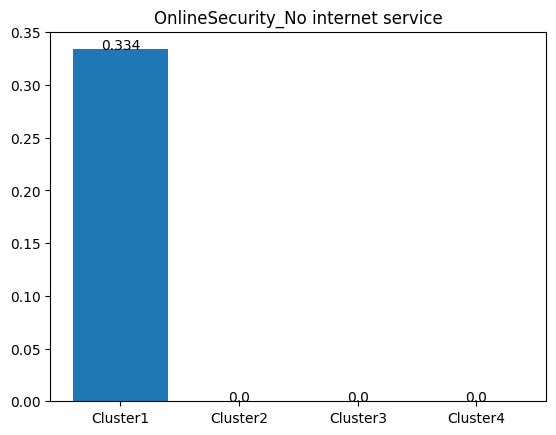

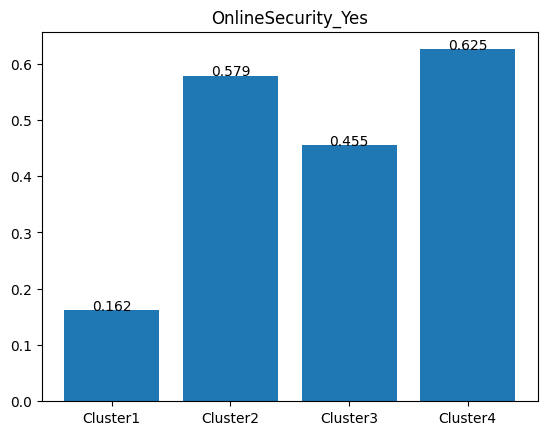

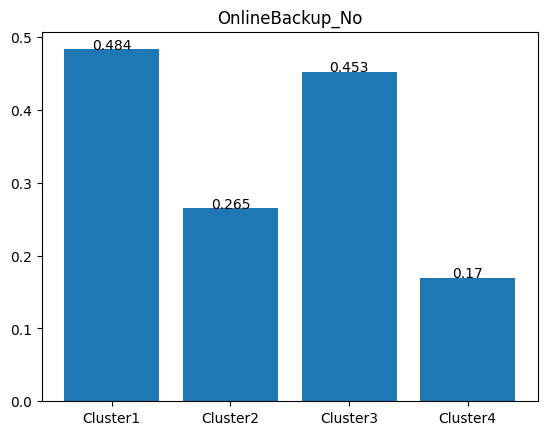

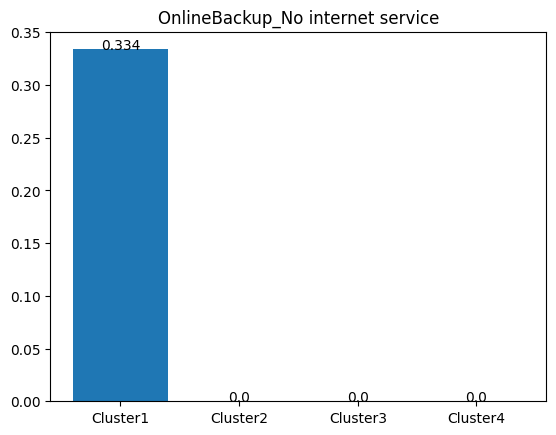

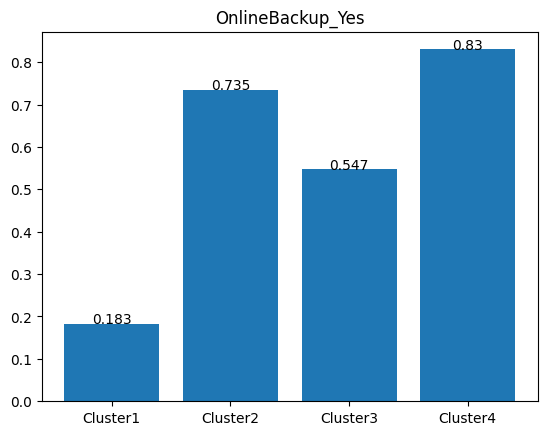

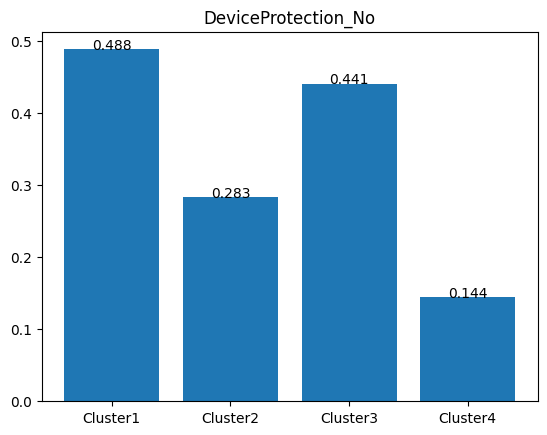

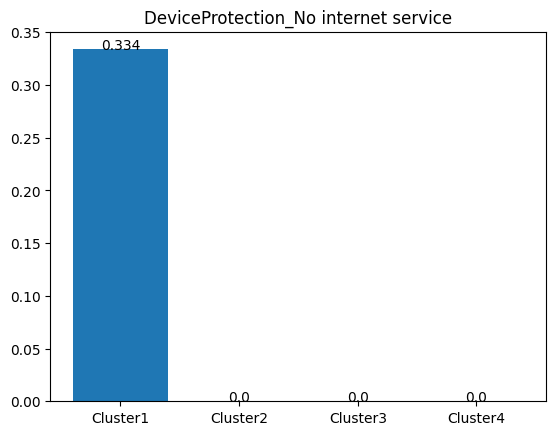

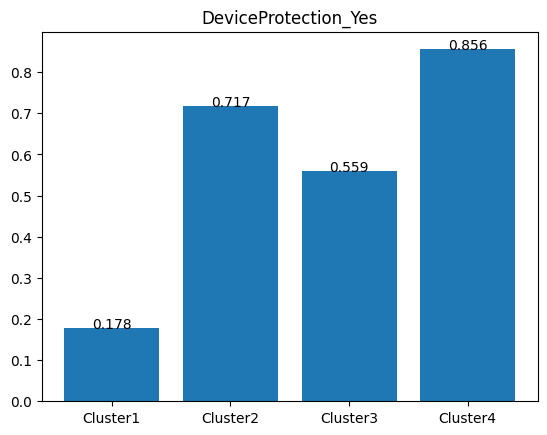

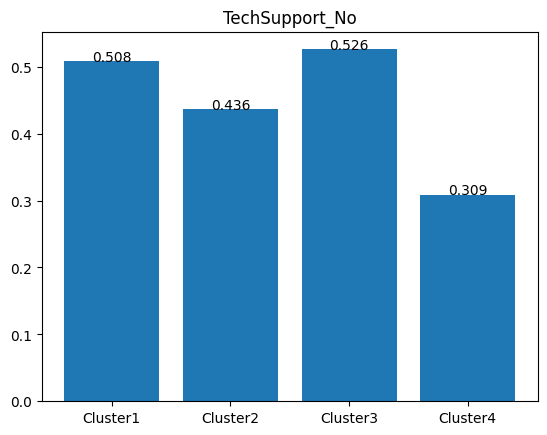

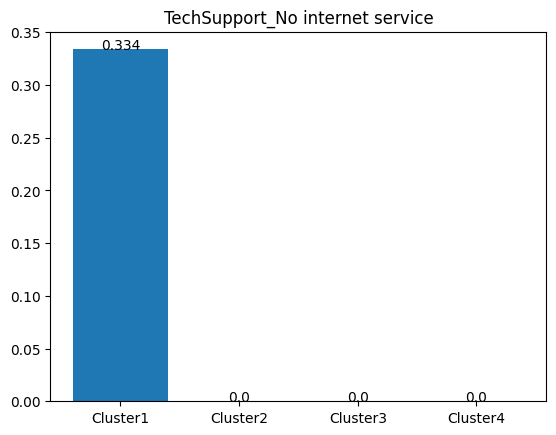

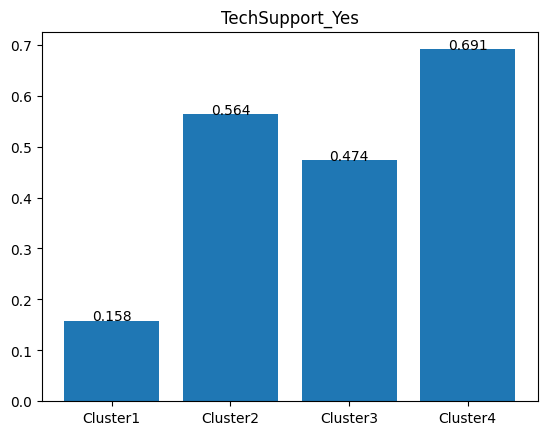

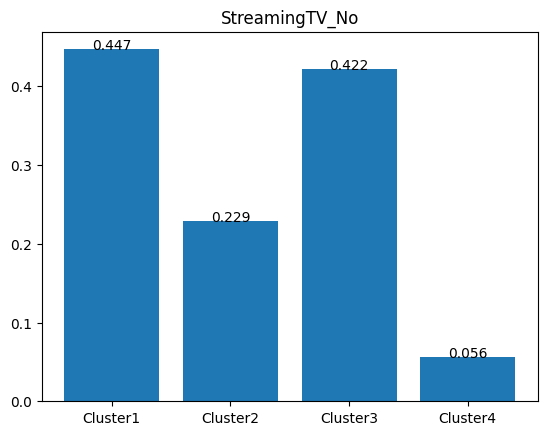

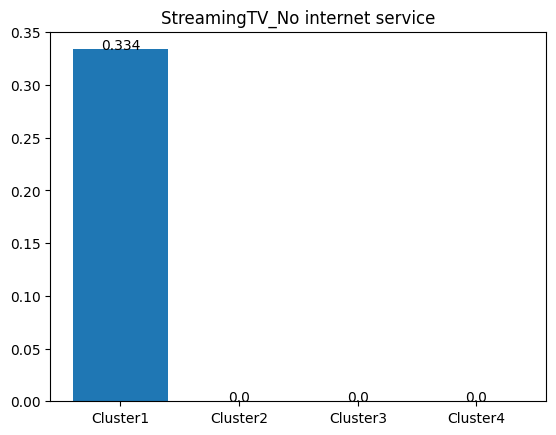

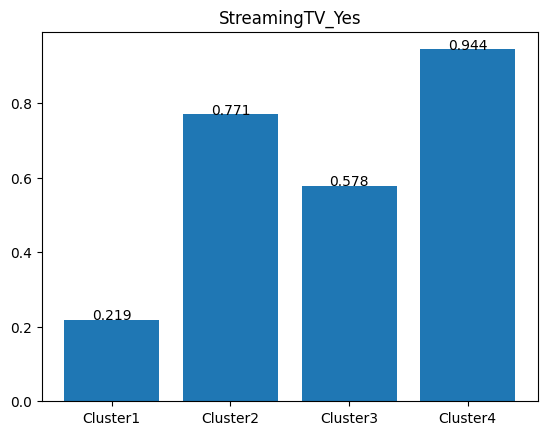

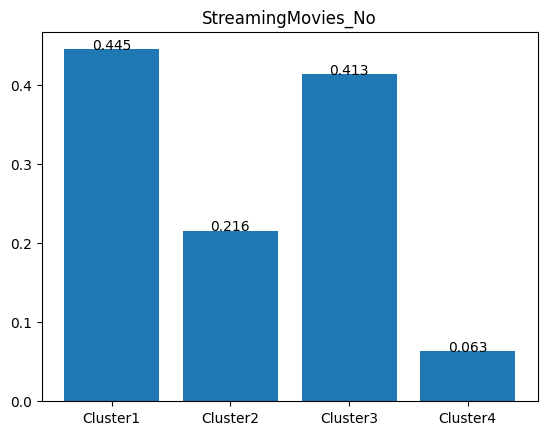

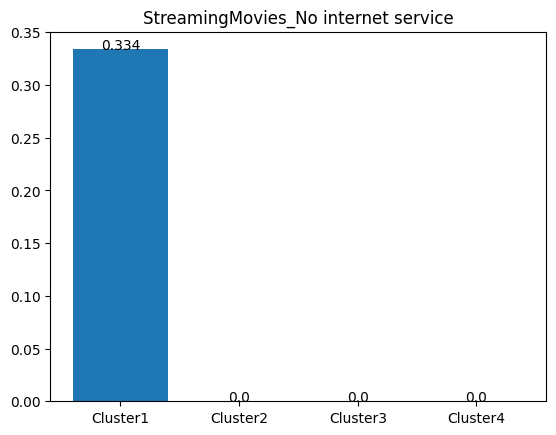

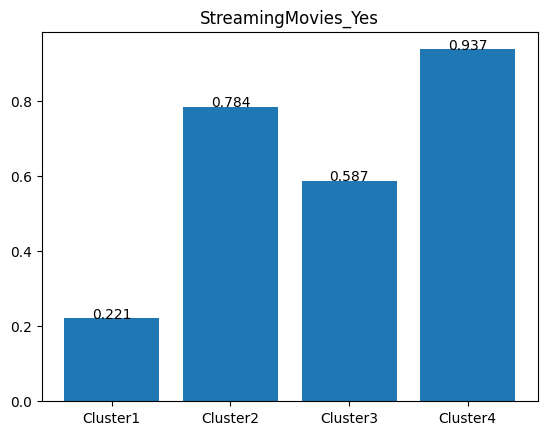

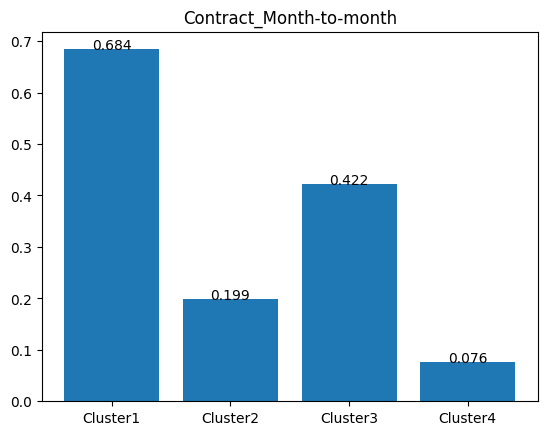

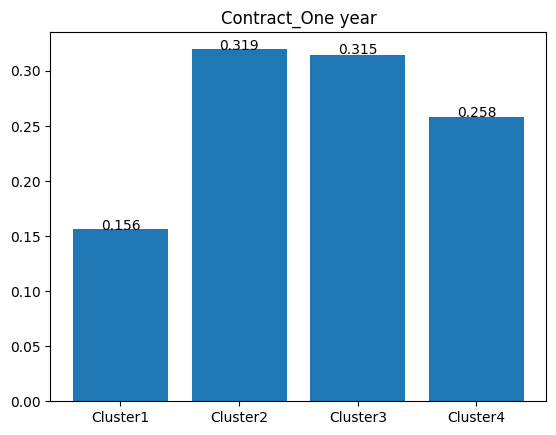

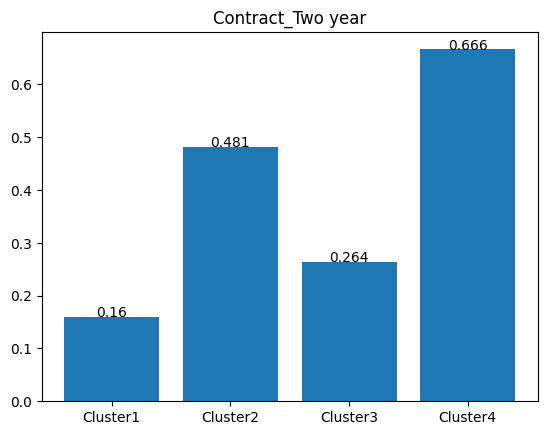

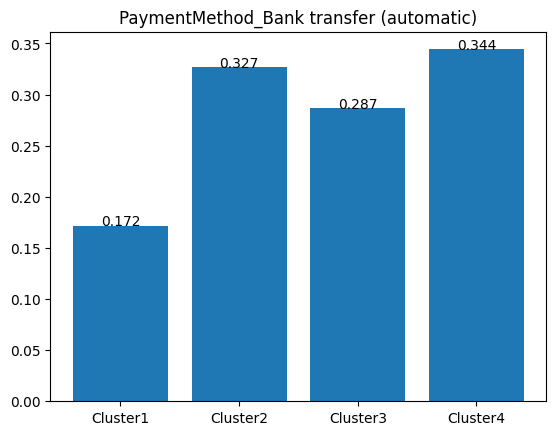

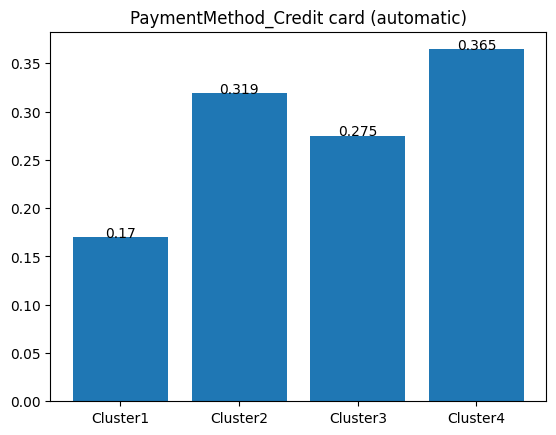

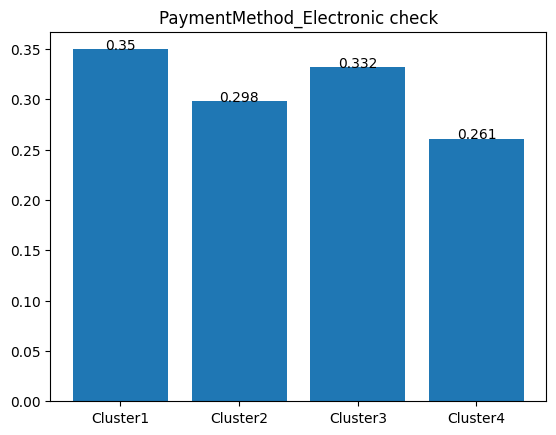

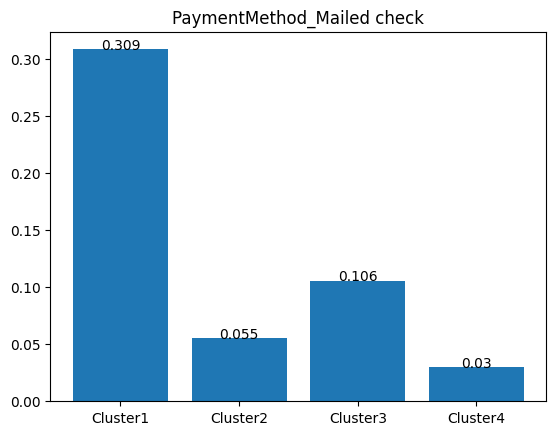

In [64]:
import csv

def addlabels(x,y):
    for a in range(len(x)):
        plt.text(a, round(y[a], 3), round(y[a], 3), ha ='center')

cluster_numbers = ["Cluster1", "Cluster2", "Cluster3", "Cluster4"]
        
with open('Processed_dataset.csv', 'r') as f:
    dict_reader = csv.DictReader(f)
    headers = dict_reader.fieldnames
    
    for header in headers:
        cluster1Value = 0
        for value in cluster1:
            clusterValue = dataset[header][value]
            cluster1Value = cluster1Value + clusterValue
        cluster1Value = cluster1Value / len(cluster1)
        
        cluster2Value = 0
        for value in cluster_2:
            clusterValue = dataset[header][value]
            cluster2Value = cluster2Value + clusterValue
        cluster2Value = cluster2Value / len(cluster_2)
        
        cluster3Value = 0
        for value in cluster_3:
            clusterValue = dataset[header][value]
            cluster3Value = cluster3Value + clusterValue
        cluster3Value = cluster3Value / len(cluster_3)
        
        cluster4Value = 0
        for value in cluster_4:
            clusterValue = dataset[header][value]
            cluster4Value = cluster4Value + clusterValue
        cluster4Value = cluster4Value / len(cluster_4)
                
        values = [cluster1Value, cluster2Value, cluster3Value, cluster4Value]
        plt.bar(cluster_numbers, values)
        plt.title(header)
        addlabels(cluster_numbers, values)
        plt.show()

### Gender Calculation

In [65]:
untouchedDataset = pd.read_csv("dataset.csv")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],3), ha = 'center')
def addlabels_2(x,y,width):
    for i in range(len(x)):
        plt.text(i+width, y[i], round(y[i],3), ha = 'center')

In [66]:
def parser(header, label1, label2, yLabel, yesLabelText, noLabelText):
    cluster1Yes, cluster2Yes, cluster3Yes, cluster4Yes = 0, 0, 0, 0
    cluster1No, cluster2No, cluster3No, cluster4No = 0, 0, 0, 0

    for value in cluster1:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster1Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster1No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)

    for value in cluster_2:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster2Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster2No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)

    for value in cluster_3:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster3Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster3No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)

    for value in cluster_4:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster4Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster4No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)

    plt.title(header)
    values1 = [cluster1Yes, cluster2Yes, cluster3Yes, cluster4Yes]
    values2 = [cluster1No, cluster2No, cluster3No, cluster4No]


    x = np.arange(len(cluster_numbers))

    width = 0.35

    bar1 =  plt.bar(x - width/2, values1, width = width,  edgecolor = 'black', label = yesLabelText)
    bar2 = plt.bar(x + width/2, values2, width=width, edgecolor = 'black', label = noLabelText)

    for bar in bar1:
        plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.1, str(bar.get_height()), ha='center', va='bottom')

    for bar in bar2:
        plt.text(bar.get_x() + bar.get_width()/2 + 0.1, bar.get_height() + 0.1, str(bar.get_height()), ha='center', va='bottom')


    n= 4
    r = np.arange(n)
    plt.xticks(r + width/2,cluster_numbers)

    plt.legend()

    plt.ylabel(yLabel)
    plt.show()

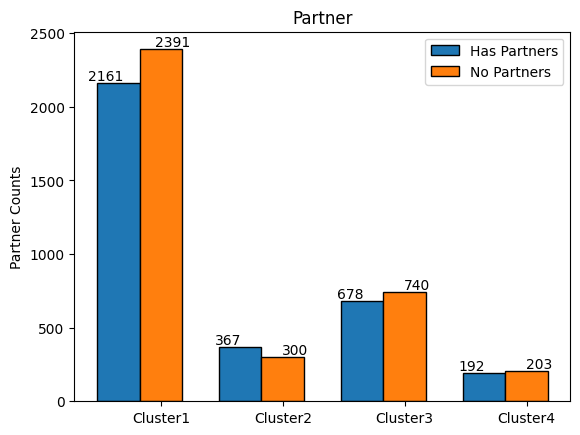

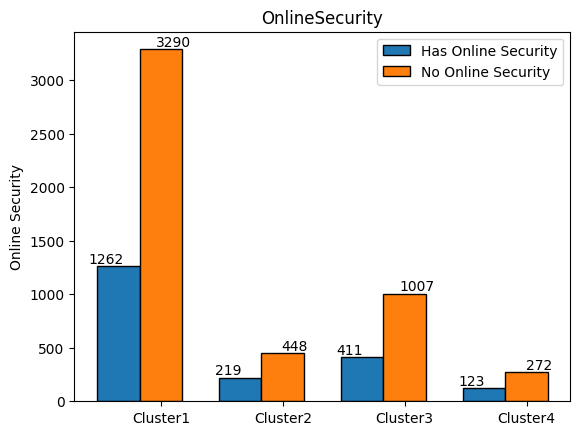

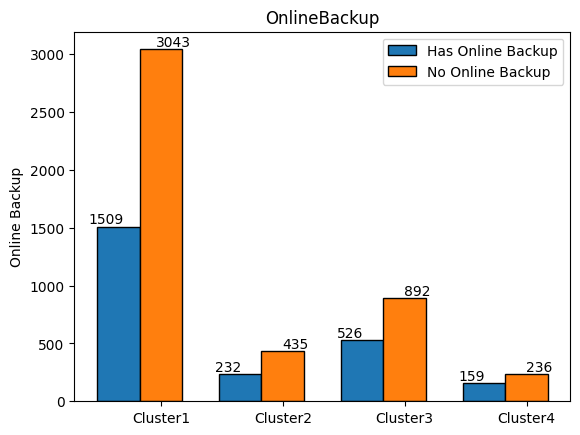

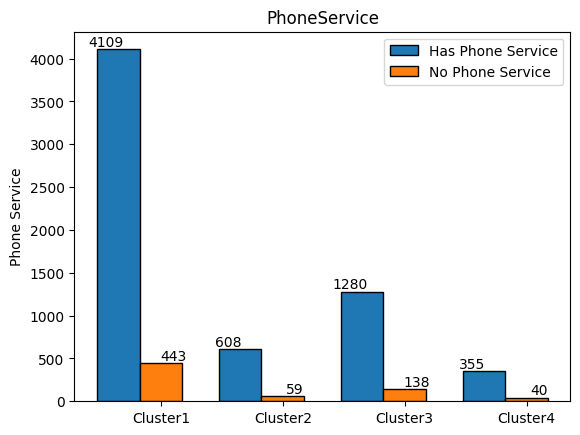

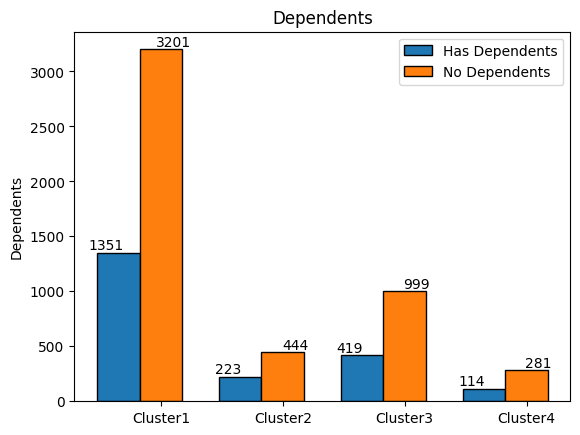

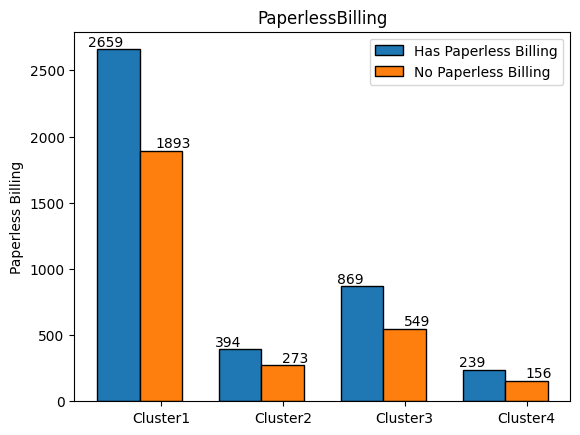

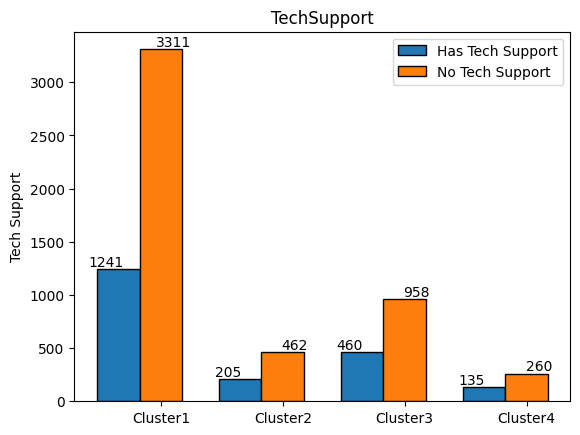

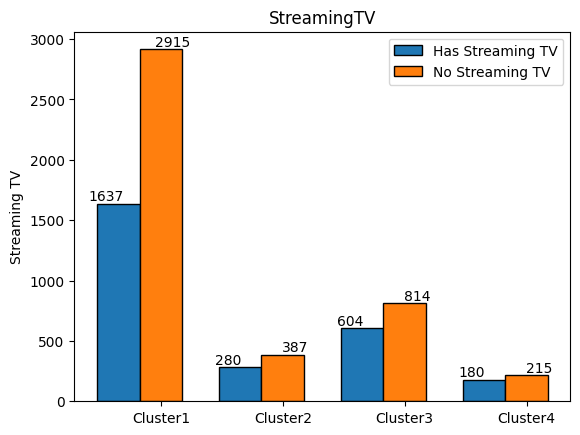

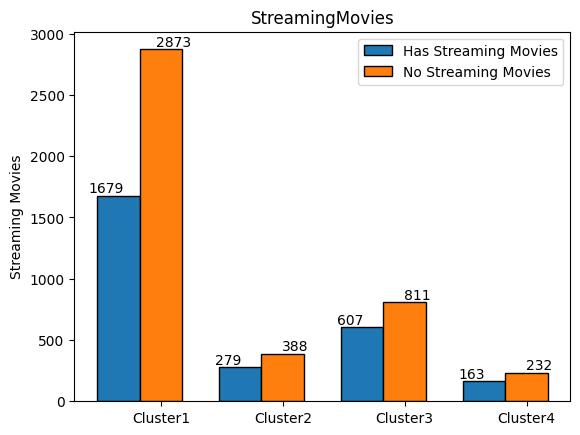

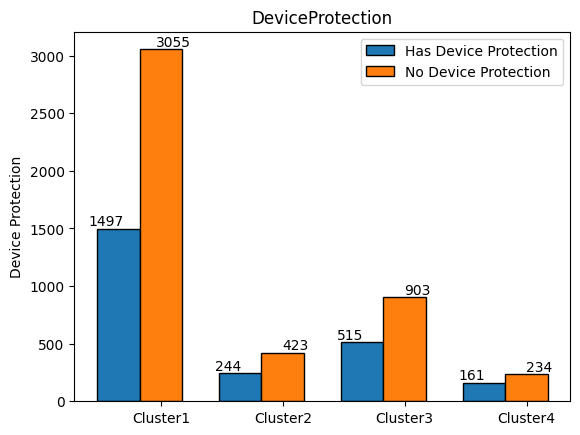

In [67]:
parser("Partner", "Yes", "No", "Partner Counts", "Has Partners", "No Partners")
parser("OnlineSecurity", "Yes", "No", "Online Security", "Has Online Security", "No Online Security")
parser("OnlineBackup", "Yes", "No", "Online Backup", "Has Online Backup", "No Online Backup")
parser("PhoneService", "Yes", "No", "Phone Service", "Has Phone Service", "No Phone Service")
parser("Dependents", "Yes", "No", "Dependents", "Has Dependents", "No Dependents")
parser("PaperlessBilling", "Yes", "No", "Paperless Billing", "Has Paperless Billing", "No Paperless Billing")
parser("TechSupport", "Yes", "No", "Tech Support", "Has Tech Support", "No Tech Support")
parser("StreamingTV", "Yes", "No", "Streaming TV", "Has Streaming TV", "No Streaming TV")
parser("StreamingMovies", "Yes", "No", "Streaming Movies", "Has Streaming Movies", "No Streaming Movies")
parser("DeviceProtection", "Yes", "No", "Device Protection", "Has Device Protection", "No Device Protection")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def parser2(header, yesLabelText, noLabelText):
        # Group by gender and SeniorCitizen, then count the number of customers
    senior_count = untouchedDataset.groupby(['gender', header]).size().reset_index(name='count')
    for value in senior_count["count"]:
        print(value)
    # Plot the results
    plt.title(header + " With Genders")
    values1 = [senior_count["count"][0], senior_count["count"][2]]
    values2 = [senior_count["count"][1], senior_count["count"][3]]
    
    
    x = np.arange(len(values2))
    plt.ylim(-2, 4000)
    width = 0.35
    
    bar1 =  plt.bar(x - width/2, values1, width = width,  edgecolor = 'black', label = yesLabelText)
    bar2 = plt.bar(x + width/2, values2, width=width, edgecolor = 'black', label = noLabelText)
    
    for bar in bar1:
        plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.1, str(bar.get_height()), ha='center', va='bottom')
    
    for bar in bar2:
        plt.text(bar.get_x() + bar.get_width()/2 + 0.1, bar.get_height() + 0.1, str(bar.get_height()), ha='center', va='bottom')
    plt.xlabel('')
    plt.ylabel(header)
    plt.title(header + ' Counts by Gender')
    n= 4
    r = np.arange(n) 
    plt.legend() 
    plt.show()

In [ ]:
parser2("SeniorCitizen", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("Partner", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("OnlineSecurity", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("OnlineBackup", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("PhoneService", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("Dependents", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("PaperlessBilling", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("TechSupport", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("StreamingTV", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("StreamingMovies", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("DeviceProtection", "Blue = No, Orange = Yes", "Left = Female, Right = Male")